<a href="https://colab.research.google.com/github/Nordoken/Project1/blob/main/co2_emissions_winc_RI_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Global CO2 Emissions_Final_RI


In [11]:
# First I upload provided CSV file to my colab

from google.colab import files

uploaded = files.upload()



Saving co2_emissions.csv to co2_emissions (1).csv


In [13]:
# Renemaing file and importing pandas

import pandas as pd
file_name = "co2_emissions.csv"
df = pd.read_csv(file_name)



In [15]:
# Getting pre-view of file and importing matlotlib

import matplotlib.pyplot as plt

print(df.head())



                          Country       1990       2005       2017      2021
0                           World  22674.120  30049.810  37077.400  37857.58
1  World – International Aviation    258.941    422.777    543.381       NaN
2  World – International Shipping    371.804    572.169    677.248       NaN
3                     Afghanistan      2.546      1.063     11.422      8.35
4                         Albania      6.583      4.196      5.026      4.59


In [21]:
# table as-is will produce a "MultiIndex" dataframe so here I rename colums and filter out rows (using words ('World|Union')) that aren't countries.

df.columns = ['Country', '1990', '2005', '2017', '2021']
print("\nDataFrame with Renamed Columns:")
print(df)

countries_df = df[df['Country'].str.contains('World|Union') == False]
print("\nDataFrame with Only Countries:")
print(countries_df)



DataFrame with Renamed Columns:
                            Country       1990       2005       2017      2021
0                             World  22674.120  30049.810  37077.400  37857.58
1    World – International Aviation    258.941    422.777    543.381       NaN
2    World – International Shipping    371.804    572.169    677.248       NaN
3                       Afghanistan      2.546      1.063     11.422      8.35
4                           Albania      6.583      4.196      5.026      4.59
..                              ...        ...        ...        ...       ...
207                         Vietnam     20.182     99.231    218.729    321.41
208                  Western Sahara      0.144      0.227      0.276      0.24
209                           Yemen      6.887     21.768     12.503     12.05
210                          Zambia      2.955      2.457      4.967      7.01
211                        Zimbabwe     17.178     11.388     12.087     12.29

[212 rows x 5 colu

<Figure size 1000x600 with 0 Axes>

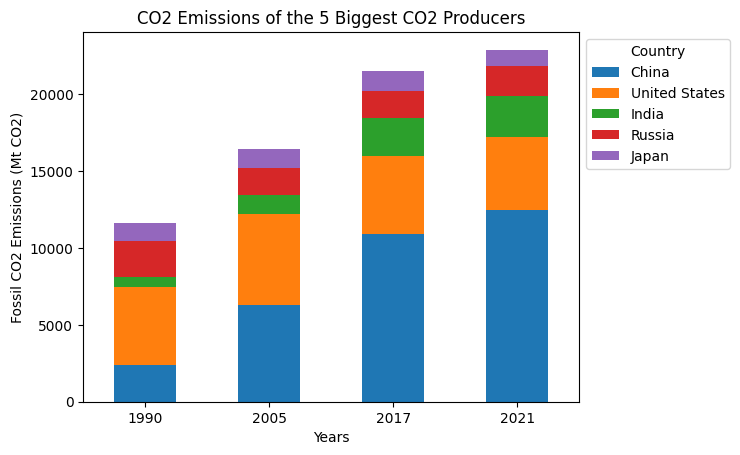

In [23]:
# Graph 1: CO2 of the bigger countries
# Before sorting I make a copy than I sort data and select top 5 countries and than I do plotting.

countries_df_copy = countries_df.copy()
countries_df_copy.sort_values(by='2021', ascending=False, inplace=True)
top5_countries = countries_df_copy.head(5)

years = ['1990', '2005', '2017', '2021']
top5_data = top5_countries[['Country'] + years].set_index('Country')

plt.figure(figsize=(10, 6))
top5_data.T.plot(kind='bar', stacked=True)
plt.title('CO2 Emissions of the 5 Biggest CO2 Producers')
plt.xlabel('Years')
plt.ylabel('Fossil CO2 Emissions (Mt CO2)')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()


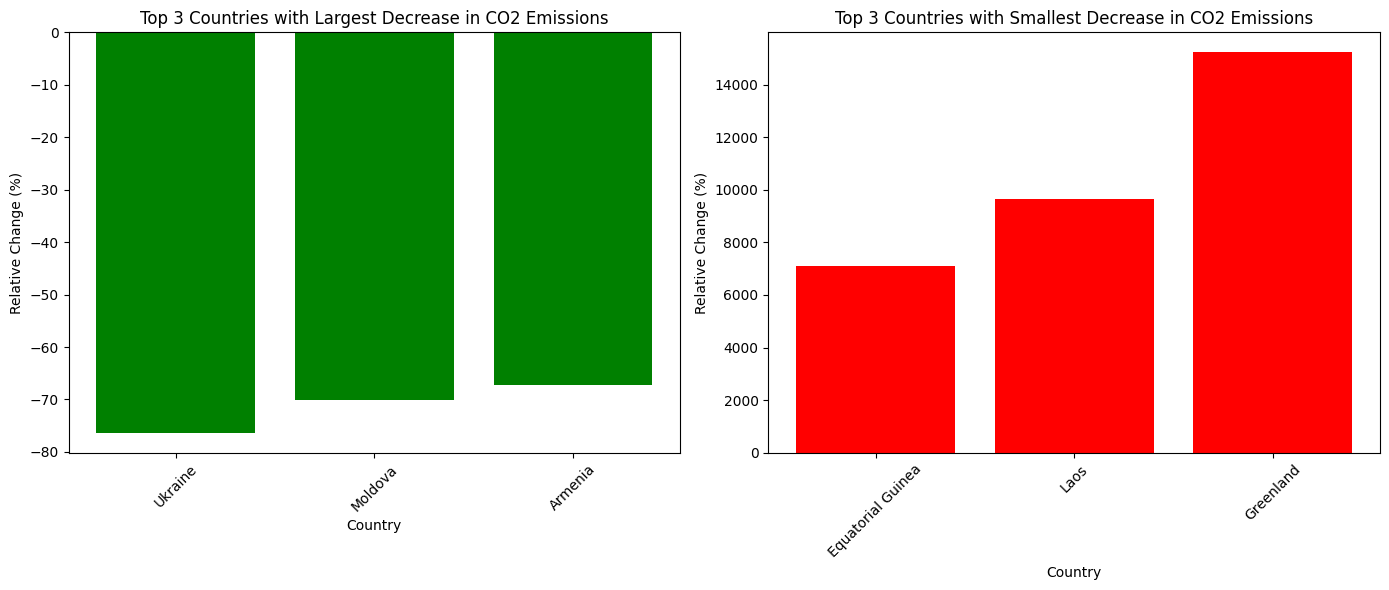

In [24]:
# Graph 2: worst and best changers
# Here i started with making 2 seperate graphs so i have better overwiev

relative_change = (countries_df['2021'] - countries_df['1990']) / countries_df['1990'] * 100
change_df = pd.DataFrame({'Country': countries_df['Country'], 'Relative Change': relative_change})
change_df.sort_values(by='Relative Change', ascending=True, inplace=True)
top3_countries = change_df.head(3)
bottom3_countries = change_df.tail(3)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top three countries
ax1.bar(top3_countries['Country'], top3_countries['Relative Change'], color='green')
ax1.set_title('Top 3 Countries with Largest Decrease in CO2 Emissions')
ax1.set_xlabel('Country')
ax1.set_ylabel('Relative Change (%)')
ax1.tick_params(axis='x', rotation=45)

# Plot the bottom three countries
ax2.bar(bottom3_countries['Country'], bottom3_countries['Relative Change'], color='red')
ax2.set_title('Top 3 Countries with Smallest Decrease in CO2 Emissions')
ax2.set_xlabel('Country')
ax2.set_ylabel('Relative Change (%)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


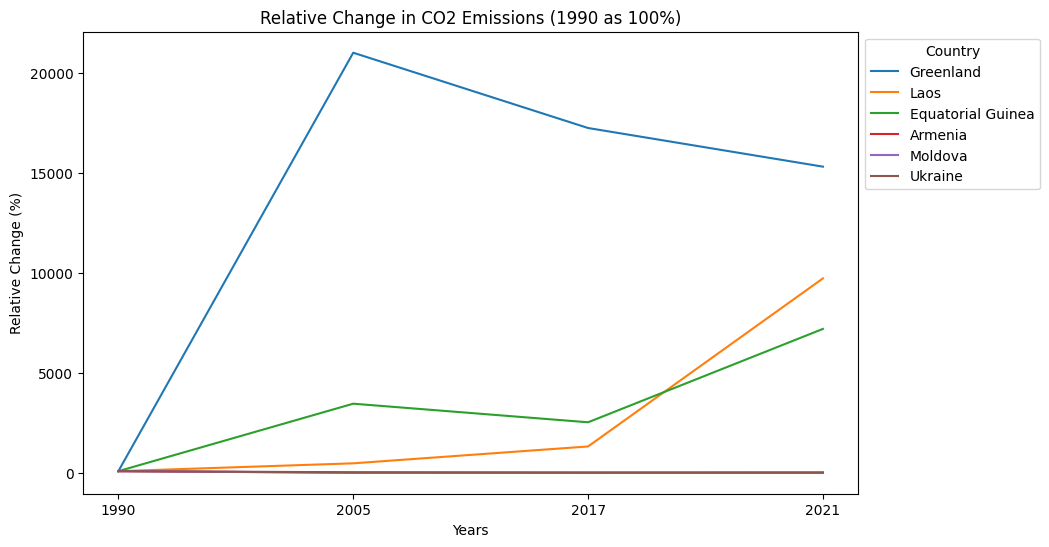

In [27]:
# Graph 2: worst and best changers
# Here remaking into one chart

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('co2_emissions.csv')

countries_df = df[~df['Country'].str.contains('World|Union')].copy()  # was getting warning all the time so had to: Create a copy to avoid the SettingWithCopyWarning


countries_df.columns = ['Country', '1990', '2005', '2017', '2021']

numeric_columns = ['1990', '2005', '2017', '2021']
countries_df[numeric_columns] = countries_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

countries_df['Relative Change'] = (countries_df['2021'] / countries_df['1990']) * 100 - 100

countries_df['Change Category'] = pd.cut(countries_df['Relative Change'], bins=[-float('inf'), 0, float('inf')], labels=['Less Well', 'Better']).astype(str)


sorted_countries_df = countries_df.sort_values(by='Relative Change', ascending=False)


top3_countries = sorted_countries_df.head(3)
bottom3_countries = sorted_countries_df.tail(3)

plt.figure(figsize=(10, 6))

# Plot lines for the top three countries
for country in top3_countries['Country']:
    plt.plot(numeric_columns, (countries_df.loc[countries_df['Country'] == country, numeric_columns].iloc[0] / countries_df.loc[countries_df['Country'] == country, '1990'].iloc[0] * 100), label=country)

# Plot lines for the bottom three countries
for country in bottom3_countries['Country']:
    plt.plot(numeric_columns, (countries_df.loc[countries_df['Country'] == country, numeric_columns].iloc[0] / countries_df.loc[countries_df['Country'] == country, '1990'].iloc[0] * 100), label=country)

plt.title('Relative Change in CO2 Emissions (1990 as 100%)')
plt.xlabel('Years')
plt.ylabel('Relative Change (%)')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()
